DEMAND FORECASTING MODEL - MACHINE LEARNING

[2] Starting data preprocessing...
    ✓ Handled missing values. New shape: (100, 24)
    ✓ Encoded: Product type
    ✓ Encoded: Customer demographics
    ✓ Encoded: Shipping carriers
    ✓ Encoded: Supplier name
    ✓ Encoded: Location
    ✓ Encoded: Transportation modes
    ✓ Encoded: Routes
    ✓ Encoded: Inspection results

[3] Features and target defined
    Features: 20
    Target: Number of products sold

[4] Data split completed
    Training set: 80 samples
    Test set: 20 samples

[5] Feature scaling completed

[6] Building neural network model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

None

[7] Training model...
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 267968.3438 - mae: 426.5204 - val_loss: 288315.5000 - val_mae: 458.3952 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 302718.5312 - mae: 456.2859 - val_loss: 287969.1250 - val_mae: 458.0096 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 335495.1250 - mae: 480.9917 - val_loss: 287552.7812 - val_mae: 457.5534 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 297129.7188 - mae: 461.8641 - val_loss: 287013.4375 - val_mae: 456.9653 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 305837.1250 - mae: 466.6289 - val_loss: 286329.9688 - val_mae: 456.2202 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 316933.7188 - mae: 469.5006 - val_loss: 285435.5938 - val_mae: 455.2397 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/ste

✓ Saved: prediction_analysis.png

✓ Model saved: demand_forecasting_model.h5
✓ Scaler saved: scaler.pkl
✓ Label encoders saved: label_encoders.pkl

[9] Example prediction with new data...

Sample Input Features:
  Price: 68.91
  Availability: 82.00
  Stock levels: 65.00
  Lead times: 24.00
  Order quantities: 7.00
  ...

Predicted Sales: 446 units
Actual Sales: 663 units
Difference: 217 units

DEMAND FORECASTING MODEL COMPLETED SUCCESSFULLY!


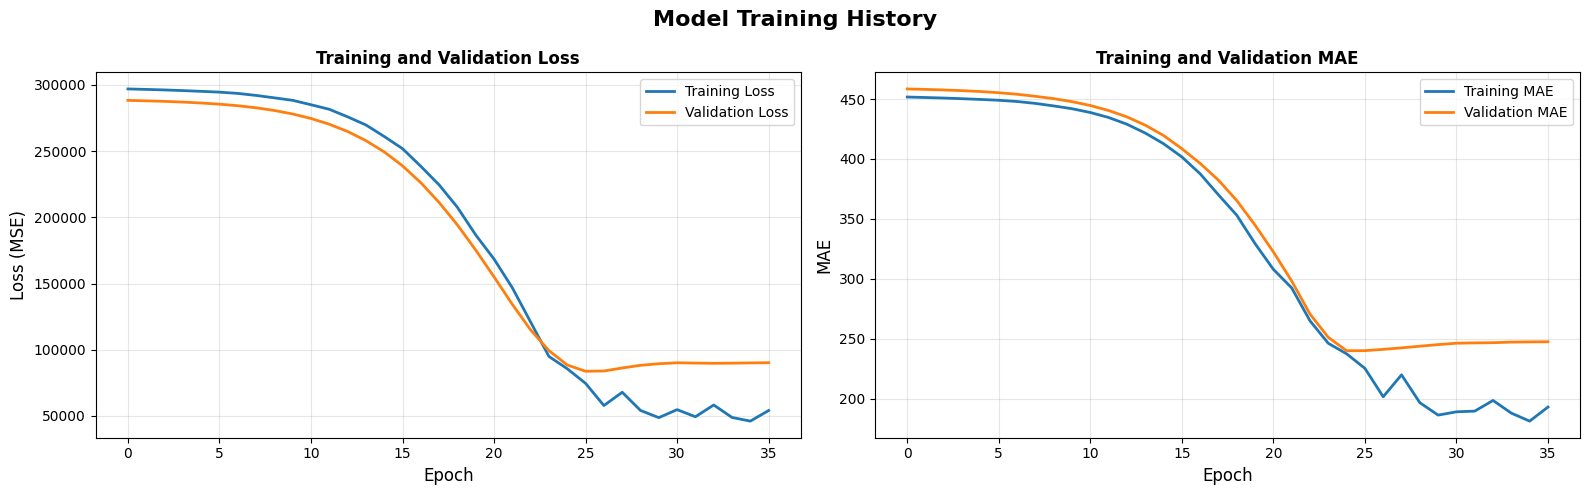

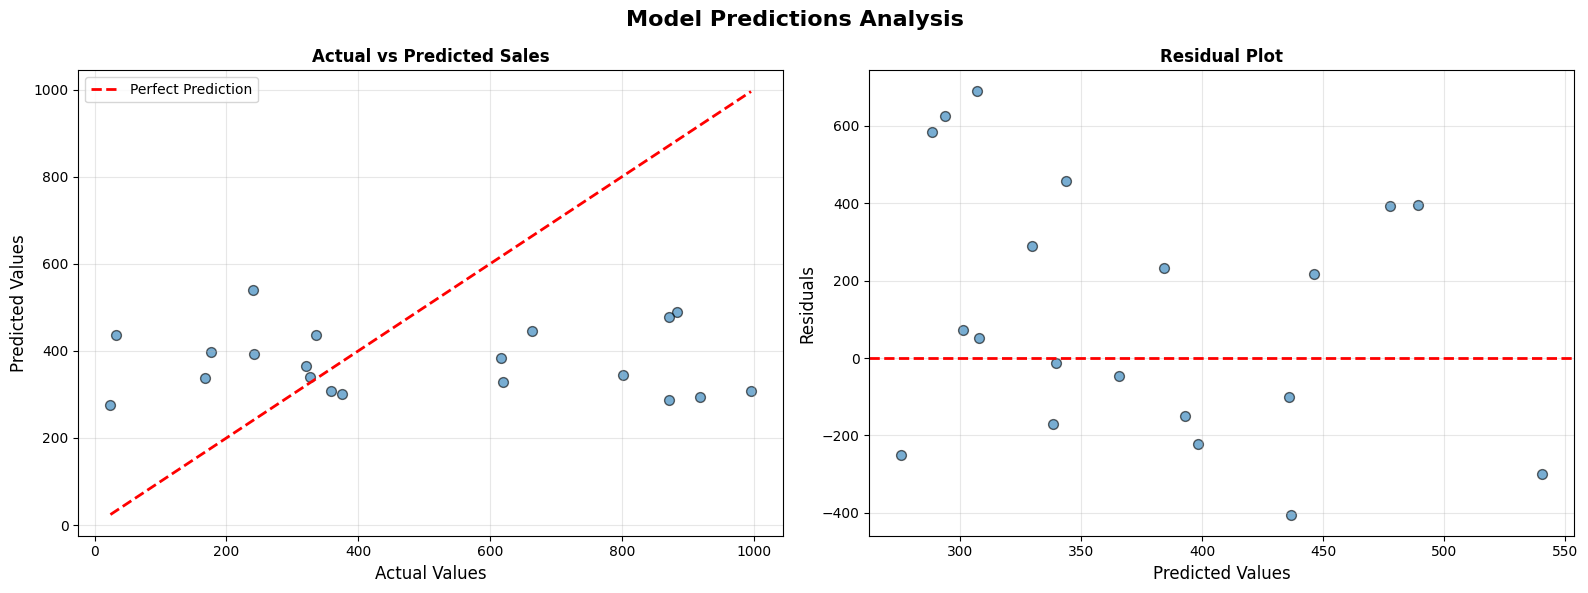

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("DEMAND FORECASTING MODEL - MACHINE LEARNING")
print("=" * 70)

# Load dataset
import pandas as pd
path = "/content/drive/MyDrive/Supply Chain Project/supply_chain_data.csv"
df = pd.read_csv(path)


# Data preprocessing
print("\n[2] Starting data preprocessing...")

# Create a copy for ML
df_ml = df.copy()

# Handle missing values (if any)
df_ml = df_ml.dropna()
print(f"    ✓ Handled missing values. New shape: {df_ml.shape}")

# Encode categorical variables
categorical_cols = ['Product type', 'Customer demographics', 'Shipping carriers',
                   'Supplier name', 'Location', 'Transportation modes',
                   'Routes', 'Inspection results']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col])
    label_encoders[col] = le
    print(f"    ✓ Encoded: {col}")

# Define features and target
target = 'Number of products sold'
feature_cols = ['Price', 'Availability', 'Stock levels', 'Lead times',
                'Order quantities', 'Shipping times', 'Shipping costs',
                'Production volumes', 'Manufacturing lead time',
                'Manufacturing costs', 'Defect rates', 'Costs',
                'Product type_encoded', 'Customer demographics_encoded',
                'Shipping carriers_encoded', 'Supplier name_encoded',
                'Location_encoded', 'Transportation modes_encoded',
                'Routes_encoded', 'Inspection results_encoded']

X = df_ml[feature_cols]
y = df_ml[target]

print(f"\n[3] Features and target defined")
print(f"    Features: {len(feature_cols)}")
print(f"    Target: {target}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n[4] Data split completed")
print(f"    Training set: {X_train.shape[0]} samples")
print(f"    Test set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"\n[5] Feature scaling completed")

# Build Neural Network Model
print(f"\n[6] Building neural network model...")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print(model.summary())

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train model
print(f"\n[7] Training model...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
print(f"\n[8] Evaluating model on test set...")
test_predictions = model.predict(X_test_scaled)
test_predictions = test_predictions.flatten()

mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"\n" + "=" * 70)
print("MODEL PERFORMANCE METRICS")
print("=" * 70)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print("=" * 70)

# Visualization - Training History
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Training and Validation MAE', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: training_history.png")

# Visualization - Predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Predictions Analysis', fontsize=16, fontweight='bold')

# Scatter plot
axes[0].scatter(y_test, test_predictions, alpha=0.6, s=50, edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Actual vs Predicted Sales', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - test_predictions
axes[1].scatter(test_predictions, residuals, alpha=0.6, s=50, edgecolor='black')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('prediction_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: prediction_analysis.png")

# Save model and scaler
model.save('demand_forecasting_model.h5')
print("\n✓ Model saved: demand_forecasting_model.h5")

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved: scaler.pkl")

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("✓ Label encoders saved: label_encoders.pkl")

# Example prediction
print(f"\n[9] Example prediction with new data...")
sample_data = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample_data)
sample_prediction = model.predict(sample_scaled, verbose=0)

print(f"\nSample Input Features:")
for col in feature_cols[:5]:
    print(f"  {col}: {sample_data[col].values[0]:.2f}")
print(f"  ...")
print(f"\nPredicted Sales: {sample_prediction[0][0]:.0f} units")
print(f"Actual Sales: {y_test.iloc[0]:.0f} units")
print(f"Difference: {abs(sample_prediction[0][0] - y_test.iloc[0]):.0f} units")

print("\n" + "=" * 70)
print("DEMAND FORECASTING MODEL COMPLETED SUCCESSFULLY!")
print("=" * 70)